# 데이터셋 구하기

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글 설정
plt.rc("font", family="HYHeadLine-Medium")
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

# 경고 메세지 안 보이게 
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

import seaborn as sns
import pandas as pd 
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [118]:
list_y2018=[]
for i in range(1,13):
    if len(str(i))==1:
        list_y2018.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_20180'+str(i)+'.csv'))
    elif len(str(i))==2:
        list_y2018.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_2018'+str(i)+'.csv'))
y2018 = pd.DataFrame([], columns=list_y2018[0].columns)
for item in list_y2018:
    y2018 =pd.concat([y2018, item]) 
    
list_y2019=[]
for i in range(1,13):
    if len(str(i))==1:
        list_y2019.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_20190'+str(i)+'.csv'))
    elif len(str(i))==2:
        list_y2019.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_2019'+str(i)+'.csv'))

y2019 = pd.DataFrame([], columns=list_y2019[0].columns)
for item in list_y2019:
    y2019 =pd.concat([y2019, item])

combined_data=pd.concat([y2018,y2019],ignore_index=True)
combined_data.columns=['측정회차','센터명','나이구분','측정구분','측정나이','입력구분','상장구분','측정일','측정회원성별',
                      '신장:cm','체중:kg','체지방율%','허리둘레:cm','혈압(최저):mmHg','혈압(최고):mmHg','악력D:kg','악력ND:kg',
                      '윗몸말아올리기:회','반복점프:회','미정','앉아윗몸앞으로굽히기:cm','일리노이:초','체공시간:초','협응력시간:초',
                      '협응력실수횟수:회','협응력계산결과값:초','BMI:kg/m','교차윗몸일으키기:회','왕복오래달리기','10M 4회 왕복달리기:초',
                      '제자리 멀리뛰기:cm','의자에앉았다일어서기:회','6분걷기:m','2분제자리걷기:회','의자에앉아 3M표적 돌아오기:회',
                      '8자보행:초','상대악력:%','피두부결합','왕복오래달리기(출력):Vo2 max','트레드밀_안정시 : bpm','트레드밀_3분 : bpm',
                      '트레드밀_6분 : bpm','트레드밀_9분 : bpm','트레드밀(출력) : VO₂max','스텝검사_회복시 심박수 : bpm','스텝검사(출력) : VO₂max',
                      '허벅지(좌)','허벅지(우)','전신반응 : 초','체공시간2 : 초']

In [119]:
# 문자를 숫자화
def chang_result(x):
    if x=='참가증':
        return 0
    elif x=='1등급':
        return 1
    elif x=='2등급':
        return 2
    elif x=='3등급':
        return 3
combined_data['결과값']=combined_data['상장구분'].apply(chang_result)
adult_data=combined_data.loc[combined_data['나이구분']=='성인']
adult_data=adult_data[['측정나이','측정회원성별','악력D:kg','교차윗몸일으키기:회','앉아윗몸앞으로굽히기:cm','왕복오래달리기','제자리 멀리뛰기:cm','체지방율%','BMI:kg/m','결과값']]
adult_data.dropna(inplace=True)

In [120]:
#adult_data.info()

In [121]:
#adult_data.isnull().sum()

In [122]:
corr=adult_data.corr()

Text(0.1, 0.3, '   상관관계 ')

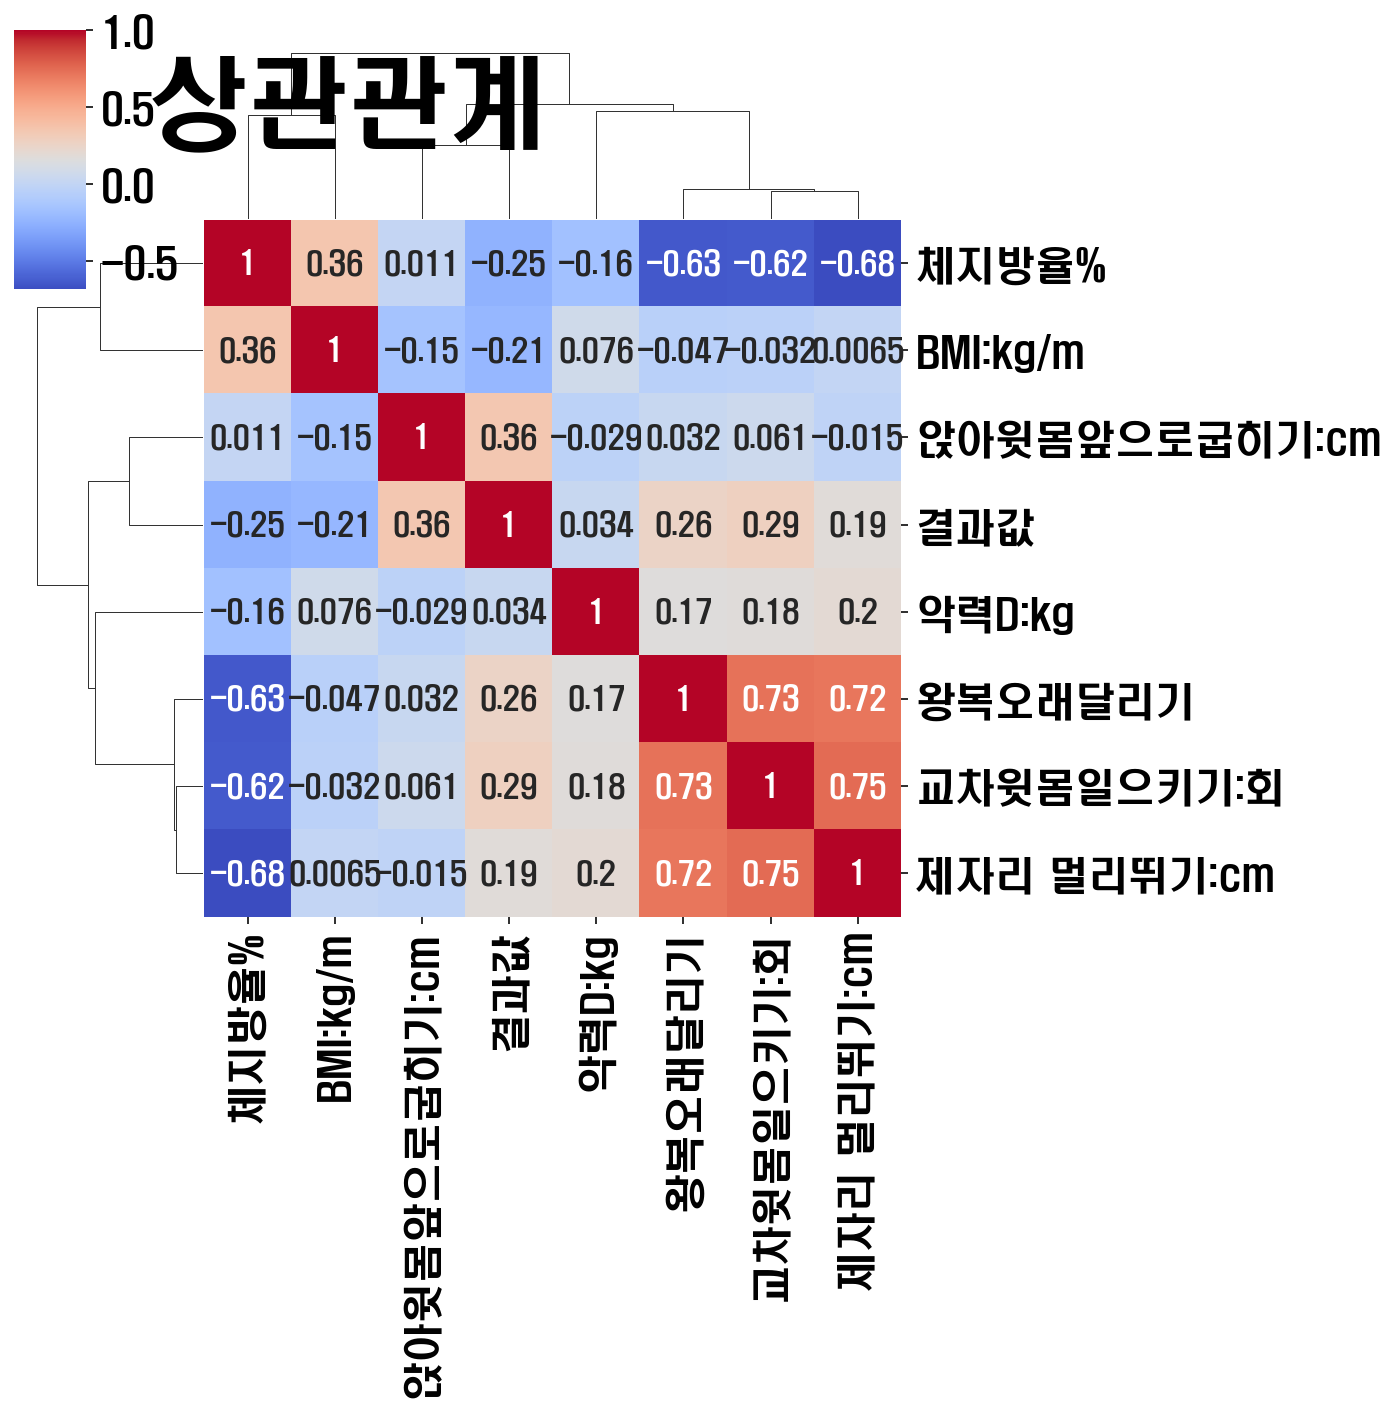

In [123]:
plt.rcParams['font.size'] = 20
bg_color = (0.88,0.85,0.95)
bg_color1 = '#FFFFFF'
plt.rcParams['figure.facecolor'] = bg_color1
# plt.rcParams['axes.facecolor'] = bg_color
sns.clustermap(corr,annot = True,      # 실제 값 화면에 나타내기
               cmap = 'coolwarm',  # Red, Yellow, Blue 색상으로 표시
#                vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
                       annot_kws={"fontsize": 15}, square=True ,
                          cbar=True,)
plt.text(0.1,0.3, "   상관관계 ", fontsize = 50, color='black')#, fontstyle='italic')

# 딥러닝

In [124]:
import tensorflow.keras.utils as utils # 분류분석시 원핫인코딩 시
from tensorflow.keras.models import Sequential # 모델 생성 시
from tensorflow.keras.layers import Dense, Activation,Input 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [125]:
def change_number(x):
    if x=='F':
        return 0
    elif x=='M':
        return 1
adult_data['측정회원성별']=adult_data['측정회원성별'].apply(change_number)
        

In [126]:
adult_data.head(3)

,측정나이,측정회원성별,악력D:kg,교차윗몸일으키기:회,앉아윗몸앞으로굽히기:cm,왕복오래달리기,제자리 멀리뛰기:cm,체지방율%,BMI:kg/m,결과값
3,22,0,23.2,28.0,20.7,24.0,150.0,31.5,21.1,3
4,26,0,23.7,39.0,23.3,31.0,150.0,24.2,21.1,2
5,48,0,19.0,4.0,-0.3,10.0,152.0,27.0,21.6,0


In [127]:
practice=adult_data.iloc[0:10000]
practice['측정회원성별']=practice['측정회원성별'].apply(lambda x: float(x))

# scale 조절

In [128]:
X_train=practice.iloc[:,:-1]

# x의 9가지 독립변수  scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_input = scaler.transform(X_train)
scaled_input = pd.DataFrame(scaled_input)
scaled_input
X_train=scaled_input.to_numpy()

#종속변수를 원핫인코딩
Target=practice[['결과값']]
Y_train=utils.to_categorical(Target,4)

In [129]:
X_train

array([[-1.32886245, -0.87655382, -0.63313619, ..., -0.21004938,
         0.43033173, -0.83477047],
       [-1.05850194, -0.87655382, -0.58363093, ..., -0.21004938,
        -0.4509451 , -0.83477047],
       [ 0.42848085, -0.87655382, -1.04898041, ..., -0.16325235,
        -0.11292111, -0.68653233],
       ...,
       [-0.99091182,  1.14083126,  1.74311649, ...,  0.93647771,
        -0.75275224,  0.85514432],
       [ 0.96920187,  1.14083126,  1.2579649 , ..., -0.32704194,
        -0.19742711,  0.79584906],
       [ 1.37474263, -0.87655382, -1.10838673, ..., -1.07579432,
         1.34782543,  0.05465837]])

# 10000개 데이터만 추출 검증데이터 1000개

In [130]:
X_val=X_train[0:1000]
Y_val=Y_train[0:1000]
X_t=X_train[1000:10000]
Y_t=Y_train[1000:10000]
X_test=X_train[9500:10000]
Y_test=Y_train[9500:10000]

# 모델구상하기

In [131]:
model = Sequential()
model.add(Input(9))
model.add(Dense(units=500, activation="elu")) # input_dim=9,
model.add(Dropout(0.1))
model.add(Dense(units=300, activation="elu"))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation="elu"))
model.add(Dropout(0.1))
model.add(Dense(units=4, activation="softmax"))

# 모델학습과정 설정하기

In [132]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', #adam sgd
             metrics=['accuracy'])

# 모델 학습하기

In [133]:
# es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50)
hist = model.fit(X_t, Y_t, epochs=300, batch_size=10, 
                 verbose=2, validation_data=(X_val, Y_val)) #callbacks=[es]

Epoch 1/300
900/900 - 1s - loss: 0.6790 - accuracy: 0.7007 - val_loss: 0.5875 - val_accuracy: 0.7120
Epoch 2/300
900/900 - 1s - loss: 0.6007 - accuracy: 0.7262 - val_loss: 0.5742 - val_accuracy: 0.7340
Epoch 3/300
900/900 - 1s - loss: 0.5838 - accuracy: 0.7378 - val_loss: 0.5634 - val_accuracy: 0.7450
Epoch 4/300
900/900 - 1s - loss: 0.5702 - accuracy: 0.7358 - val_loss: 0.5430 - val_accuracy: 0.7530
Epoch 5/300
900/900 - 1s - loss: 0.5553 - accuracy: 0.7449 - val_loss: 0.5319 - val_accuracy: 0.7550
Epoch 6/300
900/900 - 1s - loss: 0.5388 - accuracy: 0.7559 - val_loss: 0.5154 - val_accuracy: 0.7870
Epoch 7/300
900/900 - 1s - loss: 0.5216 - accuracy: 0.7656 - val_loss: 0.4925 - val_accuracy: 0.7760
Epoch 8/300
900/900 - 1s - loss: 0.5095 - accuracy: 0.7690 - val_loss: 0.4812 - val_accuracy: 0.8020
Epoch 9/300
900/900 - 1s - loss: 0.4939 - accuracy: 0.7797 - val_loss: 0.4657 - val_accuracy: 0.8060
Epoch 10/300
900/900 - 1s - loss: 0.4779 - accuracy: 0.7870 - val_loss: 0.4508 - val_accura

Epoch 82/300
900/900 - 1s - loss: 0.3135 - accuracy: 0.8643 - val_loss: 0.2892 - val_accuracy: 0.8700
Epoch 83/300
900/900 - 1s - loss: 0.3130 - accuracy: 0.8656 - val_loss: 0.2913 - val_accuracy: 0.8720
Epoch 84/300
900/900 - 1s - loss: 0.3130 - accuracy: 0.8658 - val_loss: 0.2916 - val_accuracy: 0.8700
Epoch 85/300
900/900 - 1s - loss: 0.3129 - accuracy: 0.8629 - val_loss: 0.2898 - val_accuracy: 0.8730
Epoch 86/300
900/900 - 1s - loss: 0.3138 - accuracy: 0.8616 - val_loss: 0.2897 - val_accuracy: 0.8740
Epoch 87/300
900/900 - 1s - loss: 0.3110 - accuracy: 0.8630 - val_loss: 0.2878 - val_accuracy: 0.8790
Epoch 88/300
900/900 - 1s - loss: 0.3086 - accuracy: 0.8624 - val_loss: 0.2899 - val_accuracy: 0.8710
Epoch 89/300
900/900 - 1s - loss: 0.3103 - accuracy: 0.8638 - val_loss: 0.2909 - val_accuracy: 0.8700
Epoch 90/300
900/900 - 1s - loss: 0.3098 - accuracy: 0.8638 - val_loss: 0.2873 - val_accuracy: 0.8800
Epoch 91/300
900/900 - 1s - loss: 0.3076 - accuracy: 0.8634 - val_loss: 0.2895 - v

Epoch 162/300
900/900 - 1s - loss: 0.2810 - accuracy: 0.8748 - val_loss: 0.2730 - val_accuracy: 0.8780
Epoch 163/300
900/900 - 1s - loss: 0.2780 - accuracy: 0.8774 - val_loss: 0.2761 - val_accuracy: 0.8770
Epoch 164/300
900/900 - 1s - loss: 0.2785 - accuracy: 0.8776 - val_loss: 0.2740 - val_accuracy: 0.8770
Epoch 165/300
900/900 - 1s - loss: 0.2836 - accuracy: 0.8783 - val_loss: 0.2749 - val_accuracy: 0.8760
Epoch 166/300
900/900 - 1s - loss: 0.2762 - accuracy: 0.8797 - val_loss: 0.2787 - val_accuracy: 0.8770
Epoch 167/300
900/900 - 1s - loss: 0.2754 - accuracy: 0.8790 - val_loss: 0.2788 - val_accuracy: 0.8800
Epoch 168/300
900/900 - 1s - loss: 0.2750 - accuracy: 0.8793 - val_loss: 0.2759 - val_accuracy: 0.8780
Epoch 169/300
900/900 - 1s - loss: 0.2756 - accuracy: 0.8800 - val_loss: 0.2765 - val_accuracy: 0.8760
Epoch 170/300
900/900 - 1s - loss: 0.2754 - accuracy: 0.8812 - val_loss: 0.2790 - val_accuracy: 0.8820
Epoch 171/300
900/900 - 1s - loss: 0.2764 - accuracy: 0.8791 - val_loss: 

Epoch 242/300
900/900 - 1s - loss: 0.2544 - accuracy: 0.8904 - val_loss: 0.2580 - val_accuracy: 0.8860
Epoch 243/300
900/900 - 1s - loss: 0.2586 - accuracy: 0.8881 - val_loss: 0.2789 - val_accuracy: 0.8750
Epoch 244/300
900/900 - 1s - loss: 0.2601 - accuracy: 0.8839 - val_loss: 0.2698 - val_accuracy: 0.8780
Epoch 245/300
900/900 - 1s - loss: 0.2528 - accuracy: 0.8897 - val_loss: 0.2872 - val_accuracy: 0.8770
Epoch 246/300
900/900 - 1s - loss: 0.2571 - accuracy: 0.8889 - val_loss: 0.2730 - val_accuracy: 0.8700
Epoch 247/300
900/900 - 1s - loss: 0.2540 - accuracy: 0.8857 - val_loss: 0.2615 - val_accuracy: 0.8800
Epoch 248/300
900/900 - 1s - loss: 0.2533 - accuracy: 0.8921 - val_loss: 0.2606 - val_accuracy: 0.8810
Epoch 249/300
900/900 - 1s - loss: 0.2561 - accuracy: 0.8850 - val_loss: 0.2666 - val_accuracy: 0.8840
Epoch 250/300
900/900 - 1s - loss: 0.2543 - accuracy: 0.8888 - val_loss: 0.2696 - val_accuracy: 0.8870
Epoch 251/300
900/900 - 1s - loss: 0.2552 - accuracy: 0.8882 - val_loss: 

# 모델의 학습과정 표시

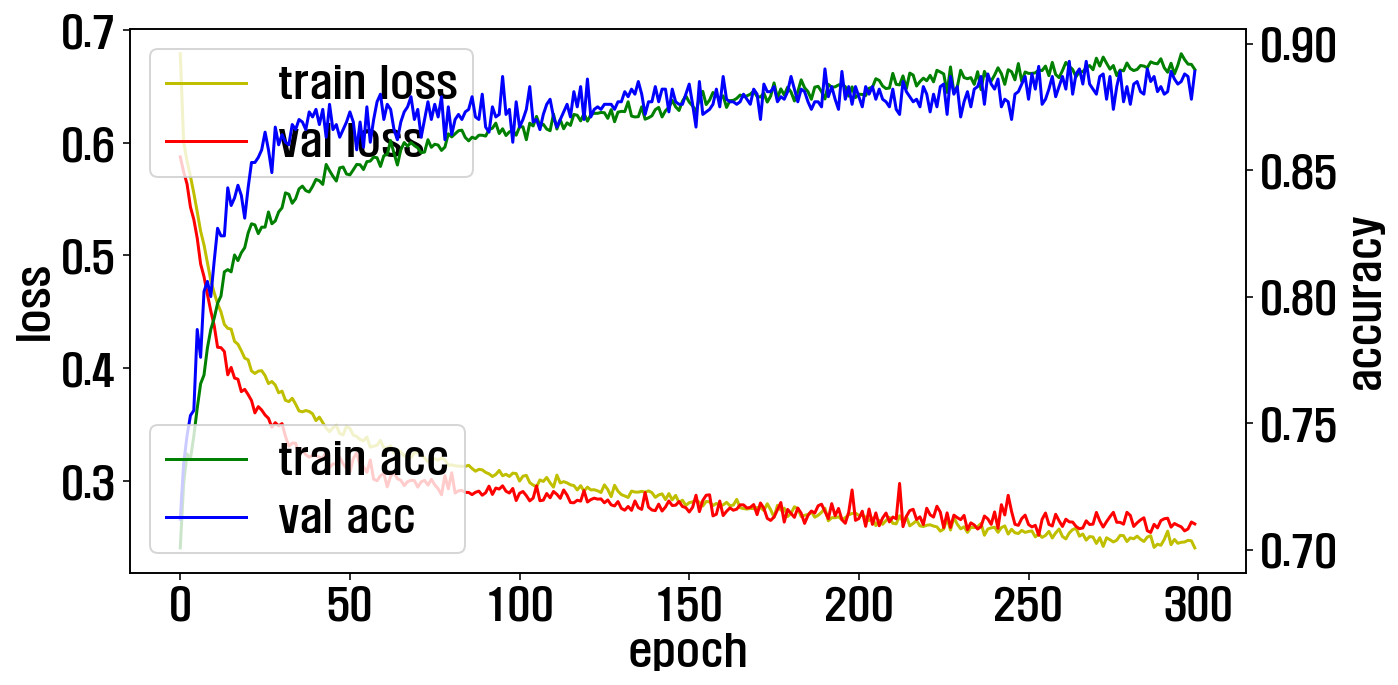

500/500 [==============================] - 0s 914us/step - loss: 0.1707 - accuracy: 0.9280


In [202]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'],'y',label="train loss")
loss_ax.plot(hist.history['val_loss'],'r', label="val loss")

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g', label="train acc")
acc_ax.plot(hist.history['val_accuracy'],'b', label="val acc")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")
loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

score = model.evaluate(X_test, Y_test, batch_size=1)


In [203]:
score = model.evaluate(X_val, Y_val, batch_size=1)
score

1000/1000 [==============================] - 1s 921us/step - loss: 0.2618 - accuracy: 0.8890


[0.2618213891983032, 0.8889999985694885]

# 테스트

In [204]:
score = model.evaluate(X_test, Y_test, batch_size=1)
score

500/500 [==============================] - 0s 878us/step - loss: 0.1707 - accuracy: 0.9280


[0.17071127891540527, 0.9279999732971191]

In [205]:
yhat=model.predict(X_test,batch_size=32)

In [206]:
cnt=0
i=0
c=[]
while cnt <(len(yhat)):
    if np.argmax(Y_test[cnt])!=np.argmax(yhat[cnt]):
        i+=1
        print(str(i)+' 번째')
        print('실제'+str(np.argmax(Y_test[cnt]))+'등급'+' ~ '+'예측'+str(np.argmax(yhat[cnt])))
    cnt+=1
    
print('전체 검증데이터 갯수'+str(len(yhat))+'총 틀린갯수'+str(i))

1 번째
실제3등급 ~ 예측0
2 번째
실제3등급 ~ 예측0
3 번째
실제3등급 ~ 예측0
4 번째
실제2등급 ~ 예측3
5 번째
실제2등급 ~ 예측1
6 번째
실제2등급 ~ 예측3
7 번째
실제0등급 ~ 예측3
8 번째
실제0등급 ~ 예측3
9 번째
실제3등급 ~ 예측0
10 번째
실제3등급 ~ 예측2
11 번째
실제2등급 ~ 예측3
12 번째
실제3등급 ~ 예측0
13 번째
실제2등급 ~ 예측1
14 번째
실제2등급 ~ 예측1
15 번째
실제3등급 ~ 예측0
16 번째
실제2등급 ~ 예측1
17 번째
실제2등급 ~ 예측3
18 번째
실제0등급 ~ 예측3
19 번째
실제3등급 ~ 예측0
20 번째
실제3등급 ~ 예측0
21 번째
실제3등급 ~ 예측1
22 번째
실제3등급 ~ 예측0
23 번째
실제3등급 ~ 예측1
24 번째
실제0등급 ~ 예측3
25 번째
실제2등급 ~ 예측3
26 번째
실제3등급 ~ 예측0
27 번째
실제2등급 ~ 예측3
28 번째
실제2등급 ~ 예측1
29 번째
실제3등급 ~ 예측0
30 번째
실제0등급 ~ 예측3
31 번째
실제0등급 ~ 예측3
32 번째
실제3등급 ~ 예측0
33 번째
실제3등급 ~ 예측0
34 번째
실제2등급 ~ 예측3
35 번째
실제3등급 ~ 예측2
36 번째
실제0등급 ~ 예측2
전체 검증데이터 갯수500총 틀린갯수36


# 모델 저장하기

In [207]:
model_json = model.to_json()
with open("CNN_fashion_mnist_model.json", "w") as json_file: 
    json_file.write(model_json)
model.save_weights("CNN_fashion_mnist_model.h5")
print("Saved model to disk")

Saved model to disk


# 모델 불러오기

In [208]:
from tensorflow.compat.v2.keras.models import model_from_json
json_file = open("CNN_fashion_mnist_model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close()

# json파일로부터 model 로드하기 
loaded_model = model_from_json(loaded_model_json) 

# 로드한 model에 weight 로드하기 
loaded_model.load_weights("CNN_fashion_mnist_model.h5") 
print("Loaded model from disk")

Loaded model from disk


# scaler 저장

In [209]:
import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']

# scaler 불러오기

In [210]:
# scaler=joblib.load('scaler.save')

In [211]:
def trans_data(n1,n2,n3,n4,n5,n6,n7,n8,n9):
    df=np.array([[n1,n2,n3,n4,n5,n6,n7,n8,n9]],dtype=np.float64)
    s_input = scaler.transform(df)
    return s_input

In [212]:
loaded_model.predict_classes(trans_data(26, 0, 23.7, 39.0, 23.3, 31.0, 150.0, 24.2, 21.1))[0]

2

# 예측하기

In [213]:
def trans_data(n1,n2,n3,n4,n5,n6,n7,n8,n9):
    df=np.array([[n1,n2,n3,n4,n5,n6,n7,n8,n9]],dtype=np.float64)
    s_input = scaler.transform(df)
    return s_input

In [214]:
adult_data.head(5)

,측정나이,측정회원성별,악력D:kg,교차윗몸일으키기:회,앉아윗몸앞으로굽히기:cm,왕복오래달리기,제자리 멀리뛰기:cm,체지방율%,BMI:kg/m,결과값
3,22,0,23.2,28.0,20.7,24.0,150.0,31.5,21.1,3
4,26,0,23.7,39.0,23.3,31.0,150.0,24.2,21.1,2
5,48,0,19.0,4.0,-0.3,10.0,152.0,27.0,21.6,0
6,47,0,25.4,26.0,20.1,16.0,155.0,30.6,21.8,3
8,53,0,23.4,1.0,20.6,16.0,125.0,30.9,22.3,0


In [218]:
model.predict_classes(trans_data(22, 0, 23.2, 28.0, 20.7, 24.0, 150.0, 31.5, 21.1))[0]

3

In [219]:
model.predict_classes(trans_data(26, 0, 23.7, 39.0, 23.3, 31.0, 150.0, 24.2, 21.1))[0]

2

In [220]:
model.predict_classes(trans_data(48, 0, 19.0, 4.0, -0.3, 10., 152.0, 27.0, 21.6))[0]

0

# 프로그램

In [221]:
def trans(n1,n2,n3,n4,n5,n6,n7,n8,n9):
    df=np.array([[n1,n2,n3,n4,n5,n6,n7,n8,n9]],dtype=np.float64)
    s_input = scaler.transform(df)
    return s_input

In [222]:
adult_data.tail(1)

,측정나이,측정회원성별,악력D:kg,교차윗몸일으키기:회,앉아윗몸앞으로굽히기:cm,왕복오래달리기,제자리 멀리뛰기:cm,체지방율%,BMI:kg/m,결과값
571170,49,0,30.4,37.0,26.3,23.0,159.0,25.9,21.4,1


In [223]:
adult_data.head(1)

,측정나이,측정회원성별,악력D:kg,교차윗몸일으키기:회,앉아윗몸앞으로굽히기:cm,왕복오래달리기,제자리 멀리뛰기:cm,체지방율%,BMI:kg/m,결과값
3,22,0,23.2,28.0,20.7,24.0,150.0,31.5,21.1,3


In [224]:
age=float(input('나이를 입력하시오'))
gender=float(input('남성:1 , 여성:0를 입력하시오'))
power=float(input('악력 값을 입력하시오'))
sit_up=float(input('윗몸일으키기 횟수를 입력하시오'))
bending=float(input('앉아윗몸앞으로굽히기:cm 값을 입력하시오'))
run=float(input('오래 달리기 횟수를 입력하시오'))
jump=float(input('제자리 멀리뛰기 cm 값을 입력하시오'))
body_fat=float(input('체지방 율을 입력하시오'))
BMI=float(input('체질량 지수(BMI)값을 입력하시오'))

def trans(n1,n2,n3,n4,n5,n6,n7,n8,n9):
    df=np.array([[n1,n2,n3,n4,n5,n6,n7,n8,n9]],dtype=np.float64)
    s_input = scaler.transform(df)
    return s_input

body_range=model.predict_classes(trans(age,gender,power,sit_up,bending,run,jump,body_fat,BMI))[0]

if body_range==3:
    print ('신체등급 예상 3등급이 나오셨습니다. 꾸준한 운동이 필요합니다')
elif body_range==2:
    print('신체등급 예상 2등급이 나오셨습니다, 건강한 신체를 가지고 계십니다')
elif body_range==1:
    print('신체등급 예상 1등급이 나오셨습니다, 피지컬 대마왕')
elif body_range==0:
    print('아쉽지만 건강등급조건에 만족하지 않으셨습니다. 참가증 받아가세요')

KeyboardInterrupt: Interrupted by user